In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import json
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load the JSON data
with open('../data/extracted_and_reformatted_data.json', 'r') as file:
    json_data = json.load(file)

In [5]:
'''
Preprocess the data
''' 

# Convert the JSON data to a DataFrame
df = pd.DataFrame(json_data)

fixed_length = 50

def convert_and_pad_or_truncate(arr, length):
    arr = np.fromstring(arr.strip('[]'), sep=',').tolist()
    if len(arr) > length:
        return arr[:length]
    elif len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), 'constant')
    return arr

# Apply padding/truncation to each operationOutput
df['operationOutput'] = df['operationOutput'].apply(lambda x: convert_and_pad_or_truncate(x, fixed_length))


# Determine the plaform of the data
def determine_platform(platform):
    if 'Linux' in platform:
        return 'Linux'
    elif 'Win' in platform:
        return 'Windows'
    elif 'iPad' in platform or 'iPhone' in platform:
        # return 'iOS'
        return 'macOS'
    elif 'Mac' in platform:
        return 'macOS'
    else:
        return 'Other'

# Get the platform from component
df['platform'] = df['components'].apply(lambda x: determine_platform(x['platform']['value']))

# Remove linux data
df = df[df['platform'] != 'Linux']

# Compute summary statistics for each operationOutput
df['mean'] = df['operationOutput'].apply(np.mean)
df['std'] = df['operationOutput'].apply(np.std)
df['min'] = df['operationOutput'].apply(np.min)
df['max'] = df['operationOutput'].apply(np.max)

df

,entryId,browserData,operationDetails,operationOutput,components,platform,mean,std,min,max
1,2501,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_inverse_saw_tooth', '...","[62.0, 23.0, 121.0, 36.0, 20.0, 4975.0, 77.0, ...","{'fonts': {'value': ['Arabic Typesetting', 'Ba...",Windows,744.6000,1783.131650,0.000,9303.000000
3,31066,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[6.714999675750732, 19.454999826848507, 17.815...","{'fonts': {'value': [], 'duration': 102}, 'dom...",macOS,16.9993,17.302972,3.610,73.980000
6,32059,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[38.16500003449619, 11.799999978393316, 37.215...","{'fonts': {'value': [], 'duration': 46}, 'domB...",macOS,63.0564,36.484954,5.990,194.470000
7,26061,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[134.0100000379607, 321.53999991714954, 753.10...","{'fonts': {'value': [], 'duration': 2343}, 'do...",Windows,894.4812,516.625525,97.235,2533.650000
8,52602,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[31.884999945759773, 1512.275000102818, 2693.9...","{'fonts': {'value': [], 'duration': 2415}, 'do...",Windows,1345.6076,2604.141791,0.000,12178.610000
...,...,...,...,...,...,...,...,...,...,...
54022,23278,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[14.710000017657876, 88.61500001512468, 29.815...","{'fonts': {'value': [], 'duration': 196}, 'dom...",macOS,229.7320,230.288465,6.165,1123.255000
54023,29869,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[16.580000519752502, 8.229999803006649, 279.88...","{'fonts': {'value': [], 'duration': 2569}, 'do...",Windows,159.9590,124.756627,8.230,501.809999
54024,43047,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[1280.7550001889467, 1033.9449997991323, 632.3...","{'fonts': {'value': [], 'duration': 2273}, 'do...",Windows,1271.2530,1595.840569,0.000,5705.545000
54026,15611,Host: frieza.herokuapp.com\nConnection: close\...,"{'executableName': 'exec_step', 'executableDur...","[32.44499955326319, 26.405000127851963, 49.999...","{'fonts': {'value': [], 'duration': 66}, 'domB...",macOS,34.4791,36.735076,4.100,222.475000


In [6]:
# Create feature matrix
X = np.vstack(df['operationOutput'].values)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Perform KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300, verbose=1)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

Initialization complete
Iteration 0, inertia 1933805.082065388.
Iteration 1, inertia 1534038.929086892.
Iteration 2, inertia 1489374.338783461.
Iteration 3, inertia 1481077.5182409598.
Iteration 4, inertia 1479379.1467215226.
Iteration 5, inertia 1479050.5445237802.
Iteration 6, inertia 1478992.344683986.
Iteration 7, inertia 1478979.2143056775.
Iteration 8, inertia 1478975.9778337749.
Converged at iteration 8: center shift 3.0401497766201198e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 1807675.9894876431.
Iteration 1, inertia 1493311.3753744112.
Iteration 2, inertia 1480172.0203836472.
Iteration 3, inertia 1479252.0579034537.
Iteration 4, inertia 1479056.8681574007.
Iteration 5, inertia 1478997.72885672.
Iteration 6, inertia 1478979.9820375387.
Iteration 7, inertia 1478975.3937340188.
Converged at iteration 7: center shift 2.8352184313377666e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 2025050.9953

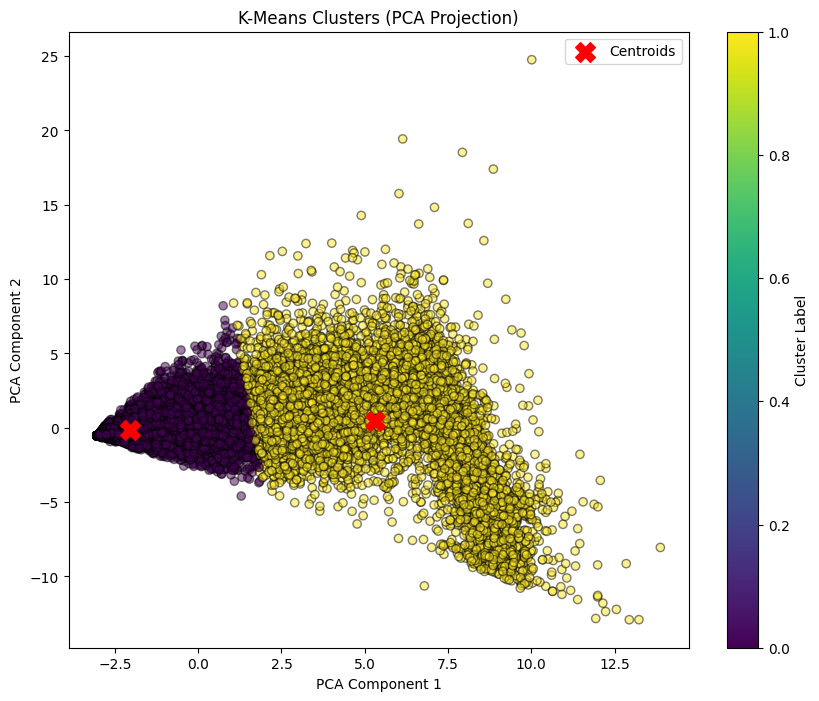

In [8]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Project the centroids onto the PCA components
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (PCA Projection)')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


Visualizing platform distribution within clusters...


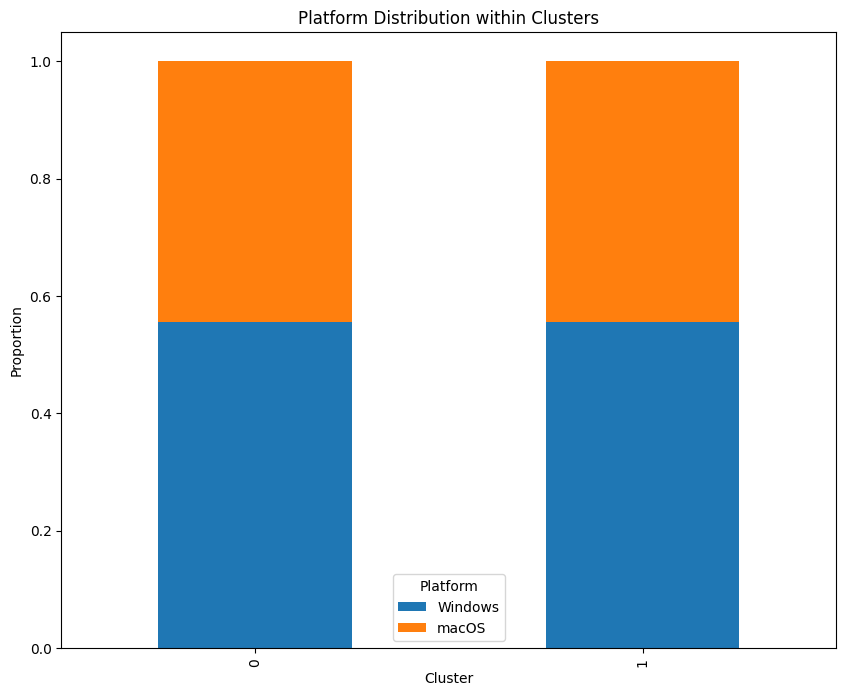

In [9]:
'''
Check the distribution of platforms within each cluster.
'''

# Calculate the distribution of platforms within each cluster
cluster_counts = df.groupby(['cluster', 'platform']).size().unstack(fill_value=0)
cluster_proportions = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# Visualize the distribution of platforms within each cluster
print("Visualizing platform distribution within clusters...")
cluster_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Platform Distribution within Clusters')
plt.legend(title='Platform')
plt.show()

IndexError: single positional indexer is out-of-bounds

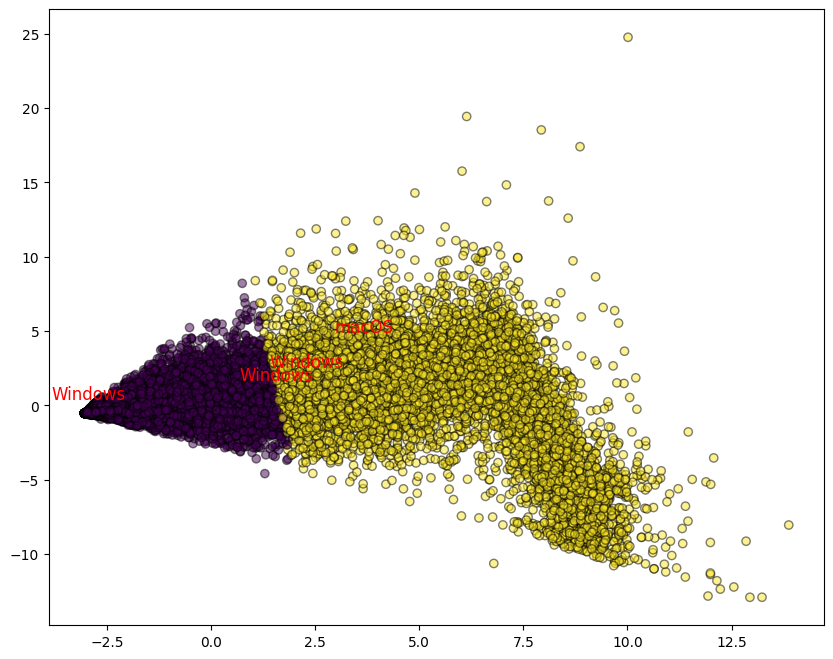

In [10]:
'''
Check the distribution of platforms within each cluster.
'''

# Select a few sample entries from each cluster
sample_indices = df.groupby('cluster').apply(lambda x: x.sample(5)).index.get_level_values(1)

# Plot these sample entries on the PCA plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, edgecolors='k')

# Highlight sample entries
for idx in sample_indices:
    plt.annotate(df['platform'].iloc[idx], (X_pca[idx, 0], X_pca[idx, 1]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='red')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (PCA Projection)')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


In [67]:
# Compute summary statistics for each cluster
cluster_profiles = df.groupby('cluster').agg({
    'mean': ['mean', 'std', 'min', 'max'],
    'std': ['mean', 'std', 'min', 'max'],
    'min': ['mean', 'std', 'min', 'max'],
    'max': ['mean', 'std', 'min', 'max'],
    'platform': lambda x: x.value_counts().index[0]  # Most common platform in the cluster
})

print("Cluster Profiles:")
print(cluster_profiles)


Cluster Profiles:
               mean                                             std   
               mean        std         min          max        mean   
cluster                                                               
0        237.436610  19.836059   83.984563   604.003574  789.327382  \
1        235.859609  17.968994  109.929221  1199.526920  786.424663   
2        228.579407  15.436760   50.526407   383.190152  669.796343   
3        232.843864  12.750007  131.084620   552.299848  842.366216   
4         46.614959  39.465890    1.400760   350.616844  186.202513   
5        198.183820  50.983987   52.752852   708.434011  740.970418   

                                                    min                  
                std         min           max      mean       std  min   
cluster                                                                  
0        355.792947  248.746500   7535.570400  0.053626  0.602473  0.0  \
1        335.779302  312.445739  18795.943904 

In [51]:
# Function to print detailed information of entries in a specific cluster
def print_cluster_entries(cluster_number):
    cluster_entries = df[df['cluster'] == cluster_number]
    for idx, row in cluster_entries.iterrows():
        print(f"Entry ID: {row['entryId']}, Platform: {row['platform']}, OperationOutput: {row['operationOutput'][:5]}...")

# Print entries in a specific cluster (e.g., cluster 0)
print_cluster_entries(2)

Entry ID: 21680, Platform: iOS, OperationOutput: [ 84.88500002  43.79500001 898.38999999 260.09500003 312.54499999]...
Entry ID: 14242, Platform: macOS, OperationOutput: [ 127.605  603.05   793.56   512.685 1142.91 ]...
Entry ID: 21925, Platform: Linux, OperationOutput: [19.27499997 93.72499993 85.94000002 34.27499998  9.16999998]...
Entry ID: 2492, Platform: Windows, OperationOutput: [ 81.78999973  81.97499998 119.99999965  74.97500023  36.4000001 ]...
Entry ID: 20765, Platform: macOS, OperationOutput: [ 78.39499973  40.23999907  78.93500105 362.90499941  78.43500003]...
Entry ID: 34100, Platform: Linux, OperationOutput: [11.71499956 17.61000045 73.68999999 14.57499992 17.78000034]...
Entry ID: 10680, Platform: iOS, OperationOutput: [193.65999848 218.62499788 258.8150017  348.51999953 525.14500171]...
Entry ID: 40970, Platform: Linux, OperationOutput: [13.92500009  2.33499985 11.23000029 19.17999983 70.41500043]...
Entry ID: 23281, Platform: Linux, OperationOutput: [55.16500003 32.134

Entries closest to the centroids for each cluster:
Cluster 0 - Entry ID: 22924, Platform: Windows
OperationOutput: [32.10499999113381, 25.144999963231385, 58.66999999852851, 56.62500002654269, 98.6949999933131, 73.29500000923872, 55.475000001024455, 48.949999967589974, 80.12499997857958, 83.7850000243634, 63.695000018924475, 52.389999967999756, 79.1299999691546, 37.48500003712252, 51.99499998707324, 51.63499998161569, 131.06500002322719, 44.35000004014, 39.9500000057742, 59.089999995194376, 44.39499997533858, 49.61500002536923, 43.73500001383945, 51.43500003032386, 66.95499998750165, 63.624999951571226, 49.12999999942258, 33.8249999913387, 50.81499996595085, 57.289999967906624, 56.5049999859184, 38.01499999826774, 153.09999999590218, 63.9699999592267, 67.33500002883375, 45.80500000156462, 70.099999953527, 63.040000037290156, 55.96500000683591, 126.38500001048669, 62.26999999489635, 65.0799999712035, 77.36999995540828, 63.039999979082495, 61.27499998547137, 57.66999995103106, 121.585000
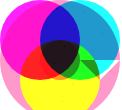
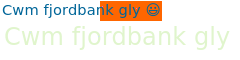
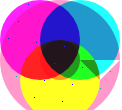
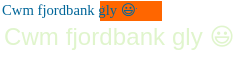
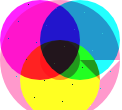
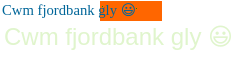
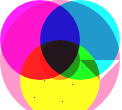
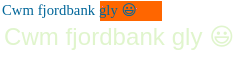

In [90]:
# Calculate distances to centroids
centroids = kmeans.cluster_centers_
df['distance_to_centroid'] = df.apply(lambda row: np.linalg.norm(X[row.name] - centroids[row['cluster']]), axis=1)

# Find the entry closest to the centroid for each cluster
closest_entries = df.loc[df.groupby('cluster')['distance_to_centroid'].idxmin()]

# Print the closest entries
print("Entries closest to the centroids for each cluster:")
for idx, row in closest_entries.iterrows():
    print(f"Cluster {row['cluster']} - Entry ID: {row['entryId']}, Platform: {row['platform']}")
    print(f"OperationOutput: {row['operationOutput']}")
    print(f"Components: {row['components']}")
    print(f"Browser: {row['browserData']}")
    print("-----\n")

In [ ]:
# Save the trained model, scaler, and PCA components
joblib.dump(kmeans, '../weights/kmeans/kmeans_model.pkl')
joblib.dump(scaler, '../weights/kmeans/scaler.pkl')
joblib.dump(pca, '../weights/kmeans/pca.pkl')

In [ ]:
# Load the trained model, scaler, and PCA components
kmeans = joblib.load('../weights/kmeans/kmeans_model.pkl')
scaler = joblib.load('../weights/kmeans/scaler.pkl')
pca = joblib.load('../weights/kmeans/pca.pkl')